### Monte Carlo Simulation
* Monte Carlo Simulation is a way of studying probability distributions with sampling. The basic idea is that if you draw many samples from a distribution and then make a histogram, the histogram will be shaped a lot like the original distribution.
* It is a process that generates a large number of random scenarios based on the input data probability. It calculates what is going to happen when the input is applied to the test function. In the end, the likelihood of results shows which outcome is the most likely.

In [34]:
from scipy.stats import norm, uniform, bernoulli, rv_discrete, gamma
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [11]:
dataset = seaborn.load_dataset('titanic')
ages = dataset.age.dropna()

## Uniform Distribution

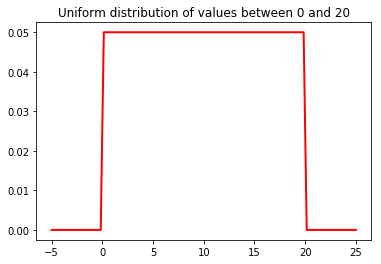

In [19]:
uniform_dist = uniform(loc=0, scale=20)
uniform_dist.rvs(size=10, random_state=0)
x = np.linspace(-5, 25, 100)
_, ax = plt.subplots(1, 1)
ax.plot(x, uniform_dist.pdf(x), 'r-', lw=2)
plt.title('Uniform distribution of values between 0 and 20')
plt.show()

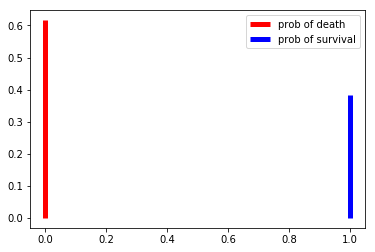

In [33]:
count_survived = dataset[dataset.survived == 1].survived.count()
count_all = dataset.survived.count()
survived_dist = bernoulli(count_survived/count_all)

_, ax = plt.subplots(1, 1)
ax.vlines(0, 0, survived_dist.pmf(0), colors='r', linestyles='-', lw=5, label = "prob of death")
ax.vlines(1, 0, survived_dist.pmf(1), colors='b', linestyles='-', lw=5, label = "prob of survival")
ax.legend(loc='best')
plt.show()

## Discrete Random Variable

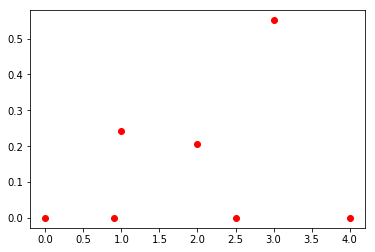

In [57]:
pclass_prob = pd.DataFrame({'prob': dataset.groupby("pclass", as_index=False).size()/dataset.pclass.count()}).reset_index()
values = pclass_prob.pclass
probs = pclass_prob.prob
custom_discreet_dist = rv_discrete(values=(values, probs))
x = [0, 0.9, 1, 2, 2.5, 3, 4]
_, ax = plt.subplots(1, 1)
ax.plot(x, custom_discreet_dist.pmf(x), 'ro', lw=2)
plt.show()

## Gamma Distribution

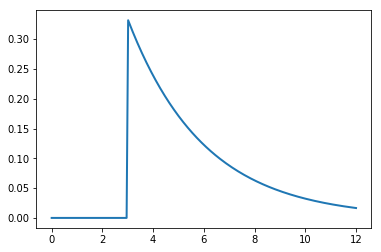

In [64]:
gamma_dist = gamma(loc=3, scale=3, a=1)
x = np.linspace(0, 12, 200)
_, ax = plt.subplots(1, 1)
ax.plot(x, gamma_dist.pdf(x), '-', lw=2)
plt.show()

In [58]:
from scipy.stats import kstest

In [59]:
help(kstest)

Help on function kstest in module scipy.stats.stats:

kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
    Perform the Kolmogorov-Smirnov test for goodness of fit.
    
    This performs a test of the distribution F(x) of an observed
    random variable against a given distribution G(x). Under the null
    hypothesis, the two distributions are identical, F(x)=G(x). The
    alternative hypothesis can be either 'two-sided' (default), 'less'
    or 'greater'. The KS test is only valid for continuous distributions.
    
    Parameters
    ----------
    rvs : str, array_like, or callable
        If a string, it should be the name of a distribution in `scipy.stats`.
        If an array, it should be a 1-D array of observations of random
        variables.
        If a callable, it should be a function to generate random variables;
        it is required to have a keyword argument `size`.
    cdf : str or callable
        If a string, it should be the name of a distrib

### Problemset
* You are considering leasing a machine for some manufacturing process. The one-year lease costs you $400,000, and you cannot cancel early. You wonder whether the annual production level and the savings in maintenance, labor, and raw materials are high enough to justify leasing the machine.
* From your human experts, you got the following ranges of variables (note that all ranges have 90% confidence interval and values are normally distributed):

    * maintenance savings: 10−20 USD per unit

    * labor savings: -2–8 USD per unit

    * raw material savings: 3−9 USD per unit

    * production level: 15,000–35000 units per year

    * annual lease: $400000

    * the annual savings = (maintenance savings + labor savings + raw material savings) * production level



In [66]:
#normal distribution
conf_int = 3.29
maintance = norm(loc=(20+10)/2, scale = (20-10)/conf_int)
labor = norm(loc=(8-2)/2, scale= (8+2)/conf_int)
raw_materials = norm(loc=(9+3)/2, scale = (9-3)/conf_int)
prod = norm(loc=(3500+1500)/2, scale=(3500-1500)/conf_int)

In [73]:
sims_n = 100000
maintance_results = maintance.rvs(sims_n, random_state=0)
labor_results = labor.rvs(sims_n, random_state=0)
raw_materials_results = raw_materials.rvs(sims_n, random_state=0)
prod_results = prod.rvs(sims_n, random_state=0)
data = pd.DataFrame({'maintenance_savings_per_unit': maintance_results,
                    'labor_savings_per_unit': labor_results,
                    'raw_materials_savings_per_unit': raw_materials_results,
                    'production_level': prod_results})
data["total_savings"] = (data.maintenance_savings_per_unit + data.labor_savings_per_unit + data.raw_materials_savings_per_unit) * data.production_level

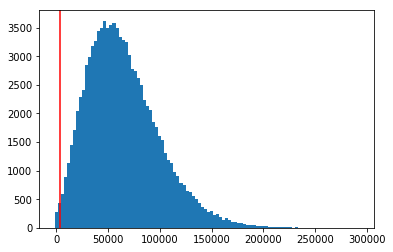

In [98]:
plt.hist(data.total_savings, bins=100)
plt.axvline(x=4000, c='r')
plt.show()

In [102]:
data[data['total_savings'] < 40000].count()['total_savings']/data.count().total_savings

0.25904

* probability of losing money (random variable is total savings, and the lease cost 40k) is 26%.